In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [2]:
os.chdir("E:\courses\IBM ML Internship\Housing Price Prediction")

In [3]:
ds=pd.read_csv('housing.csv')

In [4]:
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [84]:
numerical_col=ds.select_dtypes(exclude=['object']).columns

In [85]:
categorical=ds.select_dtypes(include=['object']).columns

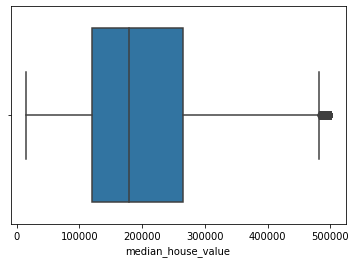

In [8]:
sns.boxplot(ds['median_house_value'])

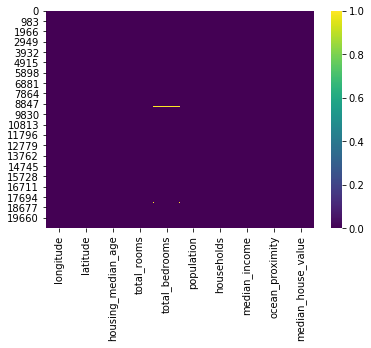

In [9]:
sns.heatmap(ds.isnull(),cmap='viridis')

In [10]:
ds.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
ds['total_bedrooms']=ds['total_bedrooms'].fillna(ds['total_bedrooms'].mean())

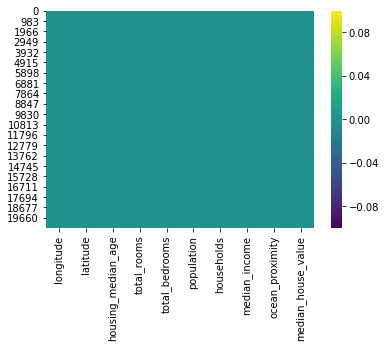

In [12]:
sns.heatmap(ds.isnull(),cmap='viridis')

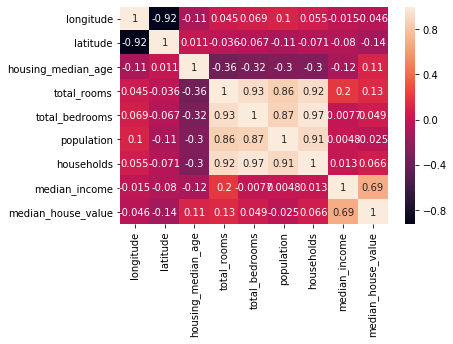

In [13]:
sns.heatmap(ds.corr(),annot=True)

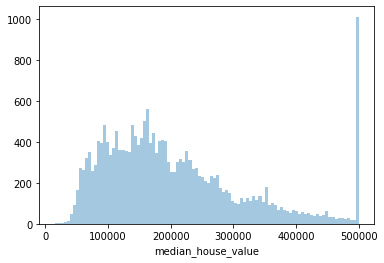

In [14]:
sns.distplot(ds['median_house_value'],kde=False,bins=100)

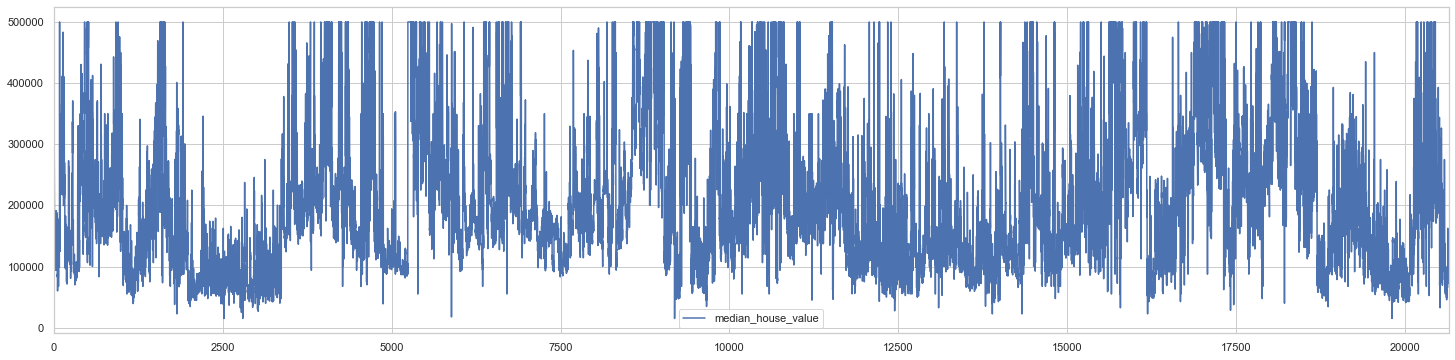

In [15]:
sns.set()
sns.set_style('whitegrid')
ds['median_house_value'].plot(figsize=(25,6),label='median_house_value')
#newdf1['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

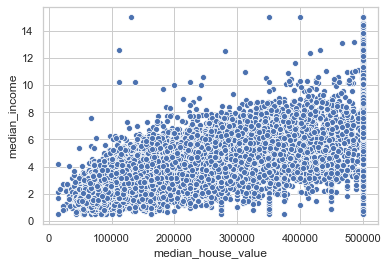

In [16]:
sns.scatterplot(x='median_house_value',y="median_income",data=ds)

In [81]:
corr=ds.corr()

In [82]:
corr['median_house_value'].sort_values(ascending=False).head(15)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

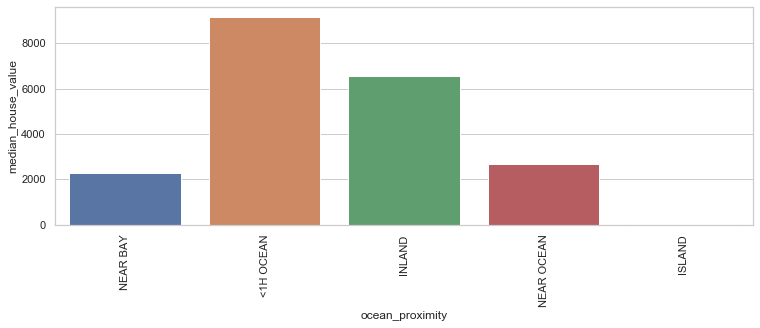

In [83]:
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='ocean_proximity', data=ds)
plt.xticks(rotation=90)
plt.ylabel('median_house_value')
plt.show()

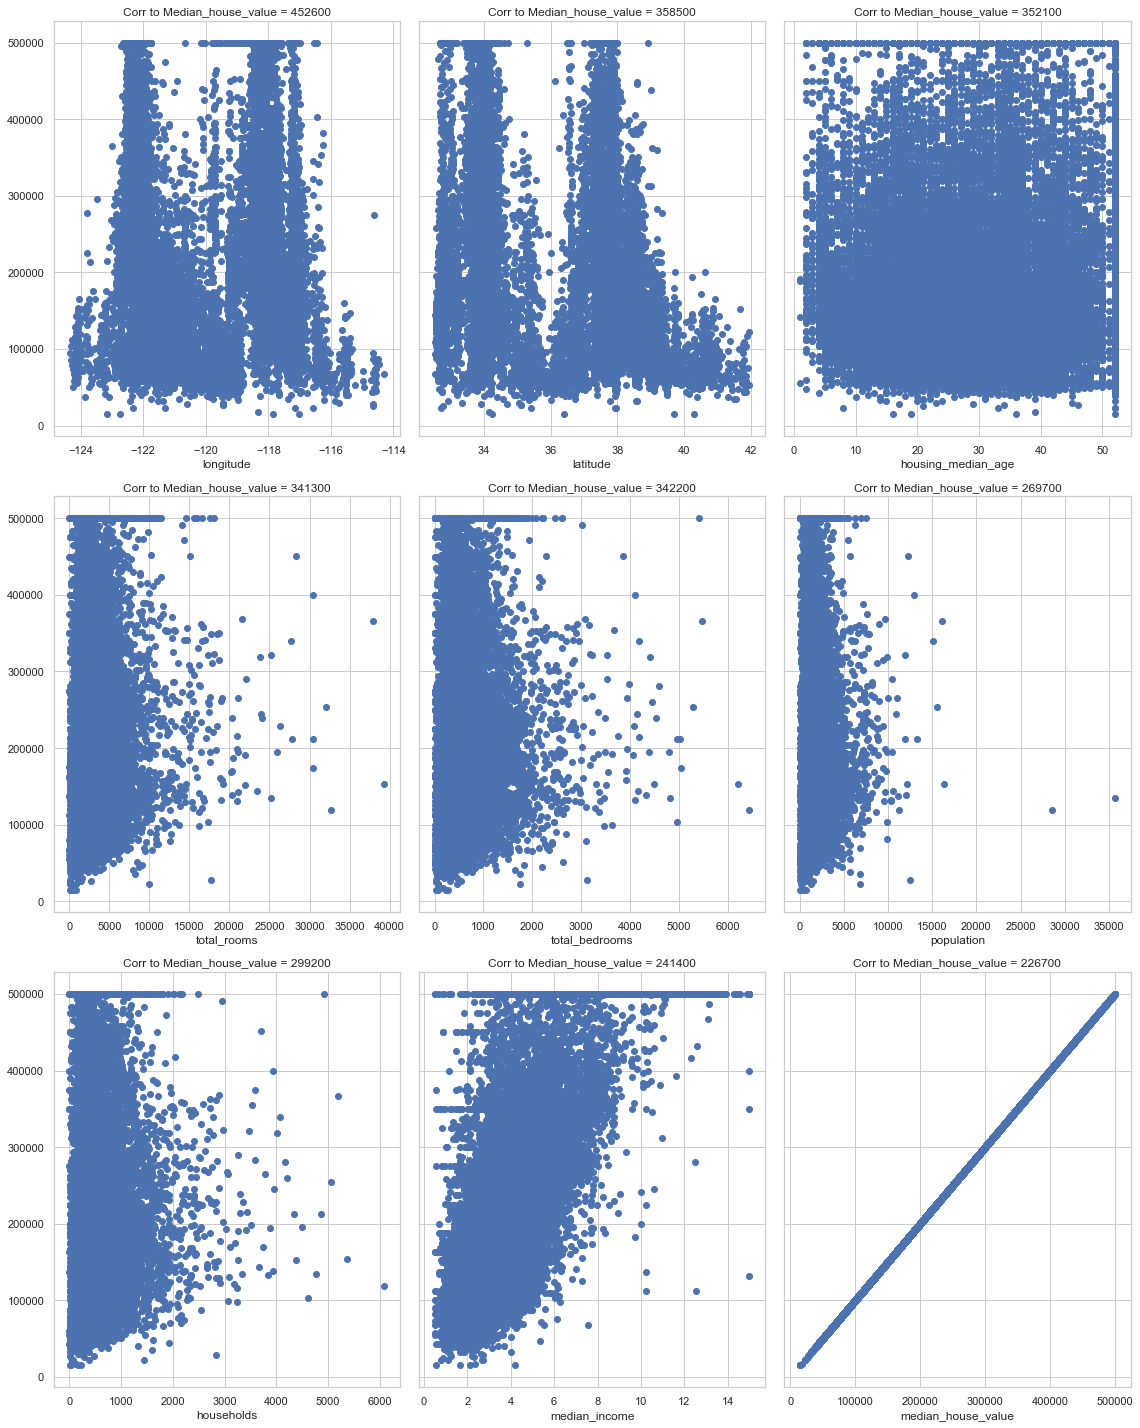

In [86]:

corr_to_price = ds['median_house_value']
n_cols = 3
n_rows = 3
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(numerical_col):
            plt.scatter(ds[numerical_col[index]], ds.median_house_value)
            plt.xlabel(numerical_col[index])
            plt.title('Corr to Median_house_value = '+ str(np.around(corr_to_price[index], decimals=3)))
            plt.tight_layout()
plt.show()

In [25]:
newdata=ds.copy()

<h3> Removing outliers from above scatterplot.</h3>

In [65]:
newdata= newdata.drop(newdata['total_rooms']
                                     [newdata['total_rooms']>27000].index)

In [66]:
newdata= newdata.drop(newdata['total_bedrooms']
                                     [newdata['total_bedrooms']>5000].index)
newdata= newdata.drop(newdata['population']
                                     [newdata['population']>15000].index)
newdata= newdata.drop(newdata['households']
                                     [newdata['households']>4300].index)

In [67]:
newdata= newdata.drop(newdata['median_income']
                                     [newdata['median_income']>14.5].index)
newdata= newdata.drop(newdata['longitude']
                                     [newdata['longitude']>-115].index)

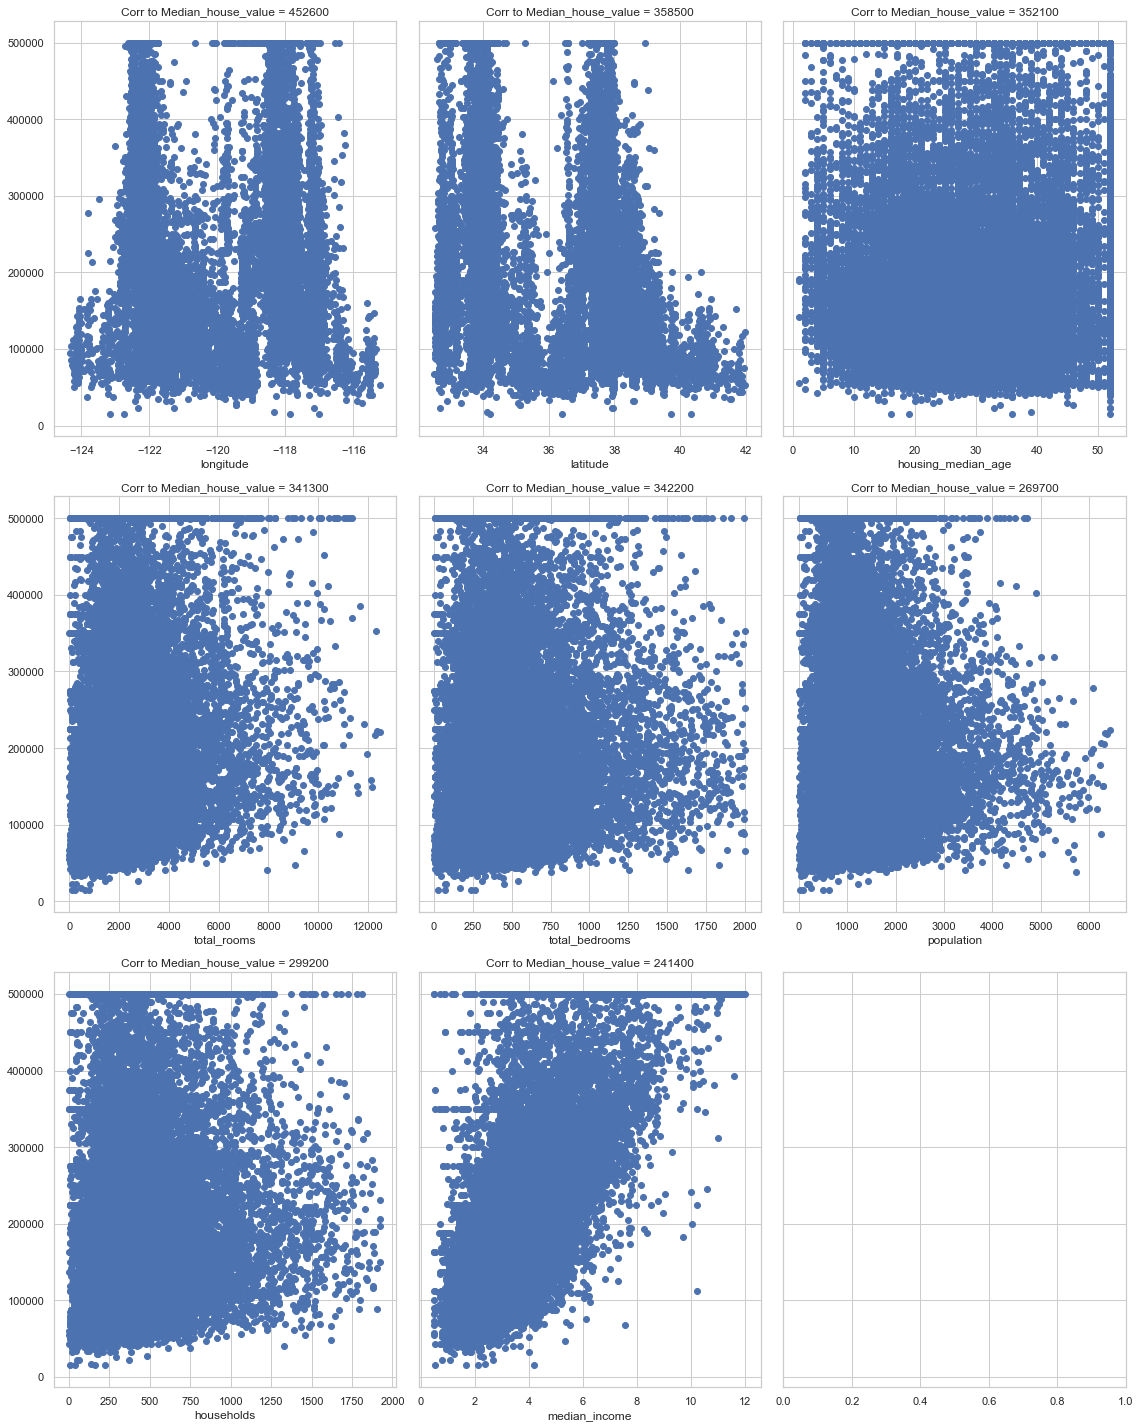

In [68]:
corr_to_price = newdata['median_house_value']
n_cols = 3
n_rows = 3
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(numerical_col):
            plt.scatter(newdata[numerical_col[index]], newdata.median_house_value)
            plt.xlabel(numerical_col[index])
            plt.title('Corr to Median_house_value = '+ str(np.around(corr_to_price[index], decimals=3)))
            plt.tight_layout()
plt.show()


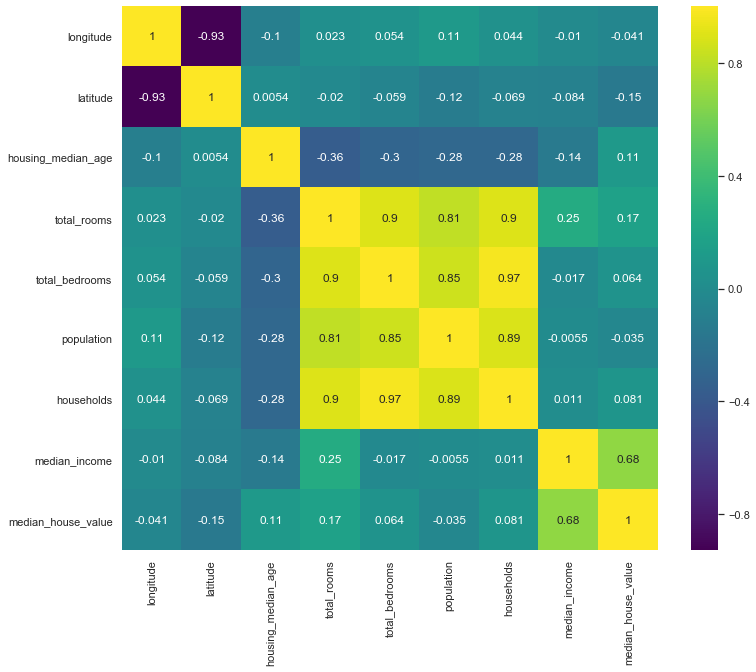

In [30]:
transformed_corr = newdata.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr,cmap='viridis',annot=True)

In [87]:
numerical_col=numerical_col.drop('median_house_value')

In [88]:
X=newdata[numerical_col]

In [89]:
#X.drop(['median_income','longitude'],axis=1,inplace=True)

In [90]:
X=preprocessing.scale(X)

In [91]:
y=newdata['median_house_value']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [93]:
DecisionTreeModel= DecisionTreeRegressor(max_leaf_nodes=500,random_state=10)
DecisionTreeModel.fit(X_train,y_train)
accuracy=DecisionTreeModel.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data'

Accuracy is: 71.8352 %


In [94]:
DecisionTreeModel.score(X_train,y_train)* 100

86.49810276749102

In [100]:
reg=RandomForestRegressor(n_estimators=500,random_state=10)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 80.7884 %


In [101]:
reg.score(X_train,y_train)

0.975092387607358

In [106]:
preds = reg.predict(X_test)
print("The prediction is:",preds[10],"But the real value is:" ,y_test.iloc[10])

The prediction is: 74687.0 But the real value is: 65400


In [99]:
preds2 = DecisionTreeModel.predict(X_test)
print("The prediction is:",preds2[23],"But the real value is:" ,y_test.iloc[23])

The prediction is: 277387.5 But the real value is: 277600
